# Code for Figure 4 part (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [6]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((10, 6, 5))
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            try:
                vals[k, i, j] = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storage_stats_20211119.csv')['Storage Rate Result'].values[0]
            except:
                print('Zero for ', penlevel, scen1, scen2)


Zero for  0.1 _Timers9pm_noWPcontrol UniversalHome
Zero for  0.1 _Timers9pm_noWPcontrol HighHome
Zero for  0.1 _Timers9pm_noWPcontrol LowHome_HighWork
Zero for  0.1 _Timers9pm_noWPcontrol LowHome_LowWork
Zero for  0.1 _Timers12am_noWPcontrol UniversalHome
Zero for  0.1 _Timers12am_noWPcontrol HighHome
Zero for  0.1 _Timers12am_noWPcontrol LowHome_HighWork
Zero for  0.1 _Timers12am_noWPcontrol LowHome_LowWork
Zero for  0.1 _TimersNone_noWPcontrol UniversalHome
Zero for  0.1 _TimersNone_noWPcontrol HighHome
Zero for  0.1 _TimersNone_noWPcontrol LowHome_HighWork
Zero for  0.1 _TimersNone_noWPcontrol LowHome_LowWork
Zero for  0.1 _TimersNone_WPcontrol_minpeak UniversalHome
Zero for  0.1 _TimersNone_WPcontrol_minpeak HighHome
Zero for  0.1 _TimersNone_WPcontrol_minpeak LowHome_HighWork
Zero for  0.1 _TimersNone_WPcontrol_minpeak LowHome_LowWork
Zero for  0.1 _TimersNone_WPcontrol_avgem UniversalHome
Zero for  0.1 _TimersNone_WPcontrol_avgem HighHome
Zero for  0.1 _TimersNone_WPcontrol_avgem

In [7]:
k = 9
penlevel = 1.0
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        try:
            vals[k, i, j] = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storage_stats_20211119.csv')['Storage Rate Result'].values[0]
        except:
            print('Zero for ', scen1, scen2)


In [8]:
vals[9, 5, 4] = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel1.0_storage_stats_20211119.csv')['Storage Rate Result'].values[0]


In [9]:
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    try:
        vals[k, 0, 4] = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel'+str(penlevel)+'_storage_stats_20211119.csv')['Storage Rate Result'].values[0]
    except:
        print('No ', penlevel)

No  0.1
No  0.2
No  0.3
No  0.4


In [10]:
df_100p = pd.DataFrame(vals[9, :, :], index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU'])

In [11]:
df_100p

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BAU
_Timers12am_noWPcontrol,21380.0,12373.0,2679.0,2750.0,0.0
_Timers9pm_noWPcontrol,8107.0,3313.0,2674.0,2747.0,0.0
_TimersNone_noWPcontrol,10496.0,5145.0,3104.0,3294.0,0.0
_TimersNone_WPcontrol_minpeak,11069.0,6671.0,7635.0,5884.0,0.0
_TimersNone_WPcontrol_avgem,10492.0,5067.0,8251.0,3201.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,5185.0


In [10]:
vals[:, 2, 0] # uncontrolled, universal access

array([    0.,     0.,     0.,     0.,  1048.,  2599.,  4500.,  6499.,
        8498., 10496.])

In [15]:
print('First pen level where requirement goes above 10GW?')
for i in range(10):
    print((i+1)*10, np.max(vals[i, :, :]))

First pen level where requirement goes above 10GW?
10 0.0
20 0.0
30 0.0
40 431.0
50 3402.0
60 6998.0
70 10593.0
80 14189.0
90 17785.0
100 21380.0


In [14]:
idx_control = 0 # 9pm timers

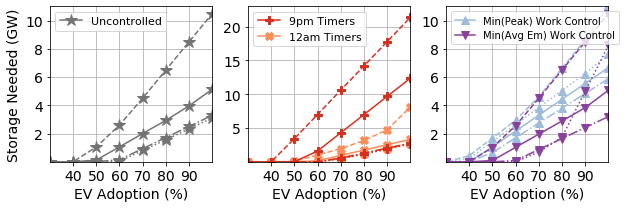

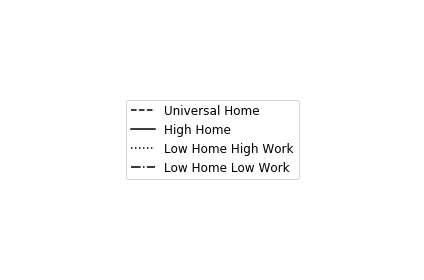

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True)
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']
markers=['P', 'X', '*', '^', 'v']
ms = [8,8,12,8,8]

for idx_control in [1, 0]: # timers
    for idx_access in range(4):
        axes[1].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], marker=markers[idx_control],  markersize=ms[idx_control], color=colors[idx_control])

axes[1].set_yticks(np.arange(5, 25, 5))
axes[1].set_yticklabels(np.arange(5, 25, 5), fontsize=14)
axes[1].set_ylim([0, 23])
axes[1].set_axisbelow(True)        
axes[1].grid()


legend_elements=[Line2D([0], [0], marker=markers[0], color=colors[0], label='9pm Timers', markerfacecolor=colors[0], markersize=ms[0]), 
                 Line2D([0], [0], marker=markers[1], color=colors[1], markerfacecolor=colors[1], markersize=ms[1], label='12am Timers')]
axes[1].legend(handles=legend_elements, loc='upper left', fontsize=11)


for idx_control in [2]: # uncontrolled + bau
    for idx_access in range(4):
        axes[0].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], markersize=ms[idx_control], marker=markers[idx_control], color=colors[idx_control])
legend_elements=[Line2D([0], [0], marker=markers[2], color=colors[2], label='Uncontrolled', markersize=ms[2])]
axes[0].legend(handles=legend_elements, loc='upper left', fontsize=11)

axes[0].set_yticks(np.arange(0, 12, 2))
axes[0].set_yticklabels(np.arange(0, 12, 2), fontsize=12)
axes[0].set_ylim([0, 11])

for idx_control in [3, 4]: # workplace
    for idx_access in range(4):
        axes[2].plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals[:, idx_control, idx_access], linestyle=lines[idx_access], marker=markers[idx_control], markersize=ms[idx_control], color=colors[idx_control])


axes[2].set_yticks(np.arange(2, 12, 2))
axes[2].set_yticklabels(np.arange(2, 12, 2), fontsize=14)
axes[2].set_ylim([0, 11])
axes[2].set_axisbelow(True)        
axes[2].grid()


legend_elements=[Line2D([0], [0], marker=markers[3], color=colors[3], markerfacecolor=colors[3], markersize=ms[3], label='Min(Peak) Work Control'), 
                 Line2D([0], [0], marker=markers[4], color=colors[4], markerfacecolor=colors[4], markersize=ms[4], label='Min(Avg Em) Work Control')]
axes[2].legend(handles=legend_elements, loc='upper left', fontsize=10)


for i in range(3):
    axes[i].set_xlim([30, 100])
    axes[i].set_xticks(np.arange(40, 100, 10))
    axes[i].set_xticklabels(np.arange(40, 100, 10), fontsize=14)
    axes[i].set_xlabel('EV Adoption (%)', fontsize=14)
axes[0].set_ylabel('Storage Needed (GW)', fontsize=14)
axes[0].set_axisbelow(True)        
axes[0].grid()
axes[0].set_yticks(np.arange(2, 11, 2))
axes[0].set_yticklabels(np.arange(2, 11, 2), fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4b.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1)
scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = [Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j], markerfacecolor=colors[2]) for j in range(4)]
ax.legend(handles=legend_elements, loc='center', fontsize=12)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4b_legend.pdf', bbox_inches='tight')
plt.show()

Investigate the increase after 80% in low home high work min(avg em) control scenario:

In [14]:
test6 = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_LowHome_HighWork_TimersNone_WPcontrol_avgem_penlevel0.6_dpdf_20211119.csv')
test7 = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_LowHome_HighWork_TimersNone_WPcontrol_avgem_penlevel0.7_withstorage_dpdf_20211119.csv')
test8 = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_LowHome_HighWork_TimersNone_WPcontrol_avgem_penlevel0.8_withstorage_dpdf_20211119.csv')
test9 = pd.read_csv('Results/StorageCurves/fuel1_solar2.5_wind2.5_LowHome_HighWork_TimersNone_WPcontrol_avgem_penlevel0.9_withstorage_dpdf_20211119.csv')
test10 = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_LowHome_HighWork_TimersNone_WPcontrol_avgem_penlevel1.0_withstorage_dpdf_20211119.csv')

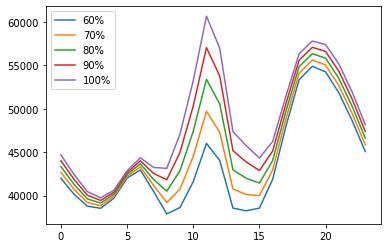

In [26]:
inds = test7[pd.to_datetime(test7['datetime']).dt.weekday.isin([0, 1, 2, 3, 4])].index
plt.plot(np.arange(0, 24), test6.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0), label='60%')
plt.plot(np.arange(0, 24), test7.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0), label='70%')
plt.plot(np.arange(0, 24), test8.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0), label='80%')
plt.plot(np.arange(0, 24), test9.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0), label='90%')
plt.plot(np.arange(0, 24), test10.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0), label='100%')
plt.legend()
plt.show()